In [2]:
#import filetype
import dgl
import pandas as pd
import numpy as np

In [5]:

# Path al file senza estensione
file_path = "C:\\Users\\elio7\\Desktop\\PageLink\\dataset\\aug_citation"


In [15]:
#Vettore del grafo
vettore = np.fromfile(file_path, dtype=np.uint8)

# Stampa i primi 10 elementi dell'array
print(vettore[:10])

# Stampa la lunghezza totale dell'array
print(len(vettore))


[ 63 161 180  70 240  79  46 221   2   0]
6105476


In [17]:
graph = dgl.load_graphs(file_path)[0]

graph2 = graph[0] #toglie la lista esterna
print(graph2)

Graph(num_nodes={'author': 7641, 'fos': 5276, 'paper': 3697, 'ref': 29347},
      num_edges={('author', 'likes', 'paper'): 4501, ('author', 'writes', 'paper'): 13126, ('fos', 'of', 'paper'): 39183, ('paper', 'cites', 'ref'): 64804, ('paper', 'in', 'fos'): 39183, ('paper', 'written_by', 'author'): 13126, ('ref', 'cited_by', 'paper'): 64804},
      metagraph=[('author', 'paper', 'likes'), ('author', 'paper', 'writes'), ('paper', 'ref', 'cites'), ('paper', 'fos', 'in'), ('paper', 'author', 'written_by'), ('fos', 'paper', 'of'), ('ref', 'paper', 'cited_by')])


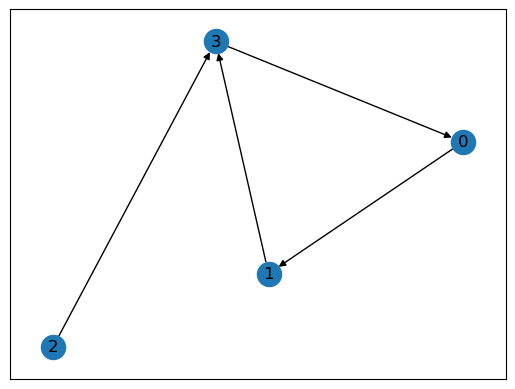

In [8]:
####  PROVA PER CERCARE DI VISUALIZZARE UN GRAFO DGL ####

import networkx as nx
import matplotlib.pyplot as plt

# Crea un grafo DGL di esempio
grafoprova = dgl.graph(([0, 1, 2, 3], [1, 3, 3, 0]))

# Converti il grafo DGL in un grafo networkx
nx_graph = grafoprova.to_networkx()

# Disegna il grafo utilizzando networkx e matplotlib
nx.draw_networkx(nx_graph, with_labels=True)
plt.show()

In [10]:
# Ottieni le informazioni sulla struttura del grafo
num_nodes = graph2.num_nodes()
num_edges = graph2.num_edges()
metagraph = graph2.metagraph()

print("Numero di nodi:", num_nodes)
print("Numero di archi:", num_edges)
print("Metagraph:", metagraph)
print(graph2)

Numero di nodi: 45961
Numero di archi: 238727
Metagraph: MultiDiGraph with 4 nodes and 7 edges
Graph(num_nodes={'author': 7641, 'fos': 5276, 'paper': 3697, 'ref': 29347},
      num_edges={('author', 'likes', 'paper'): 4501, ('author', 'writes', 'paper'): 13126, ('fos', 'of', 'paper'): 39183, ('paper', 'cites', 'ref'): 64804, ('paper', 'in', 'fos'): 39183, ('paper', 'written_by', 'author'): 13126, ('ref', 'cited_by', 'paper'): 64804},
      metagraph=[('author', 'paper', 'likes'), ('author', 'paper', 'writes'), ('paper', 'ref', 'cites'), ('paper', 'fos', 'in'), ('paper', 'author', 'written_by'), ('fos', 'paper', 'of'), ('ref', 'paper', 'cited_by')])


In [9]:
##Modello salvato dal train_linkpred.py
graph_pred = "C:\\Users\\elio7\\Desktop\\PageLink\\saved_models\\aug_citation_model.pth"
a = open(graph_pred)
print(a)

<_io.TextIOWrapper name='C:\\Users\\elio7\\Desktop\\PageLink\\saved_models\\aug_citation_model.pth' mode='r' encoding='UTF-8'>


In [11]:
output_1 = np.fromfile("C:\\Users\\elio7\\Desktop\\PageLink\\saved_explanations\\pagelink_aug_citation_model_pred_edge_to_comp_g_edge_mask", dtype=np.uint8)
print(len(output_1), "\n", output_1[0: 100])
print("\n")
output_2 = np.fromfile("C:\\Users\\elio7\\Desktop\\PageLink\\saved_explanations\\pagelink_aug_citation_model_pred_edge_to_paths", dtype=np.uint8)
print(len(output_2), "\n", output_2)

47710760 
 [128   4 149  13   0   1   0   0   0   0   0 125 148  40 140   6  97 117
 116 104 111 114 148  77 167   8 134 148 140   5 112  97 112 101 114 148
  77  83   4 134 148 134 148 125 148  40 140   6  97 117 116 104 111 114
 148 140   5 108 105 107 101 115 148 140   5 112  97 112 101 114 148 135
 148 140  12 116 111 114  99 104  46  95 117 116 105 108 115 148 140  18
  95 114 101  98 117 105 108 100  95 116]


1014837 
 [128   4 149 ... 101 117  46]


In [38]:
from utils import plot_hetero_graph
sg, inverse_indices = dgl.khop_out_subgraph(graph2, {'author': 0}, k=2, store_ids=True)
sg

#plot_hetero_graph(sg)

Graph(num_nodes={'author': 6, 'fos': 13, 'paper': 2, 'ref': 30},
      num_edges={('author', 'likes', 'paper'): 0, ('author', 'writes', 'paper'): 7, ('fos', 'of', 'paper'): 15, ('paper', 'cites', 'ref'): 32, ('paper', 'in', 'fos'): 15, ('paper', 'written_by', 'author'): 7, ('ref', 'cited_by', 'paper'): 32},
      metagraph=[('author', 'paper', 'likes'), ('author', 'paper', 'writes'), ('paper', 'ref', 'cites'), ('paper', 'fos', 'in'), ('paper', 'author', 'written_by'), ('fos', 'paper', 'of'), ('ref', 'paper', 'cited_by')])

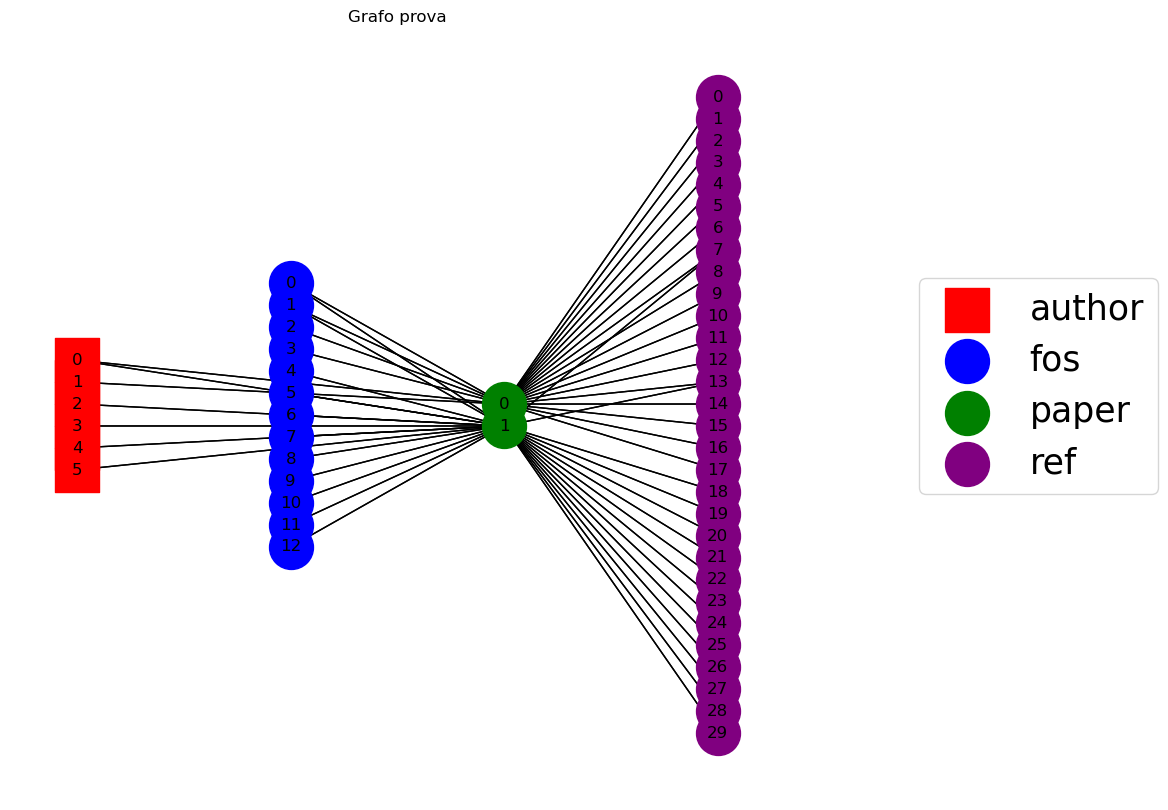

In [56]:
plot_hetero_graph(sg, ntypes_to_ncolors = {"author" : "red", "fos" : "blue", "paper" : "green", "ref" : "purple"},
                  title = "Grafo prova", legend=True, ntypes_to_nshapes = {"author" : "s", "fos" : "o", "paper" : "o", "ref" : "o"})

In [21]:
import torch
g = dgl.graph(([0, 2, 0, 4, 2], [1, 1, 2, 3, 4]))
g.edata['w'] = torch.arange(10).view(5, 2)
sg, inverse_indices = dgl.khop_out_subgraph(g, 0, k=2)
sg


(tensor([0, 0, 2, 2]), tensor([1, 2, 1, 3]))